/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7757 - loss: 0.6450 - val_accuracy: 0.8490 - val_loss: 0.4205
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8620 - loss: 0.3837 - val_accuracy: 0.8707 - val_loss: 0.3660
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8743 - loss: 0.3418 - val_accuracy: 0.8778 - val_loss: 0.3463
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8839 - loss: 0.3160 - val_accuracy: 0.8835 - val_loss: 0.3308
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8902 - loss: 0.2953 - val_accuracy: 0.8712 - val_loss: 0.3463
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8658 - loss: 0.3592

Overall Test Accuracy: 0.8666

Per-Class Accuracy (Recall):
             recall
T-shirt/top   0.861
Trouser       0.968
Pullover      0.824
Dress         0.883
Coat          0.818
Sandal        0.982
Shirt         0.552
Sneaker       0.

<ipython-input-3-78c6afe31d70>:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=report_df.loc[class_names].index,


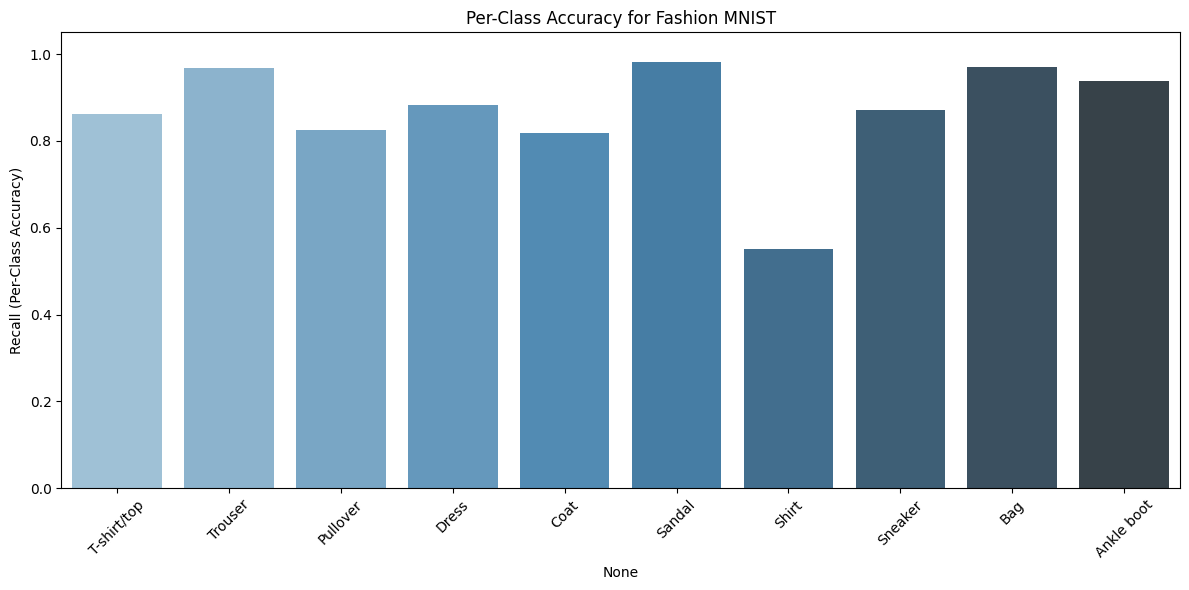

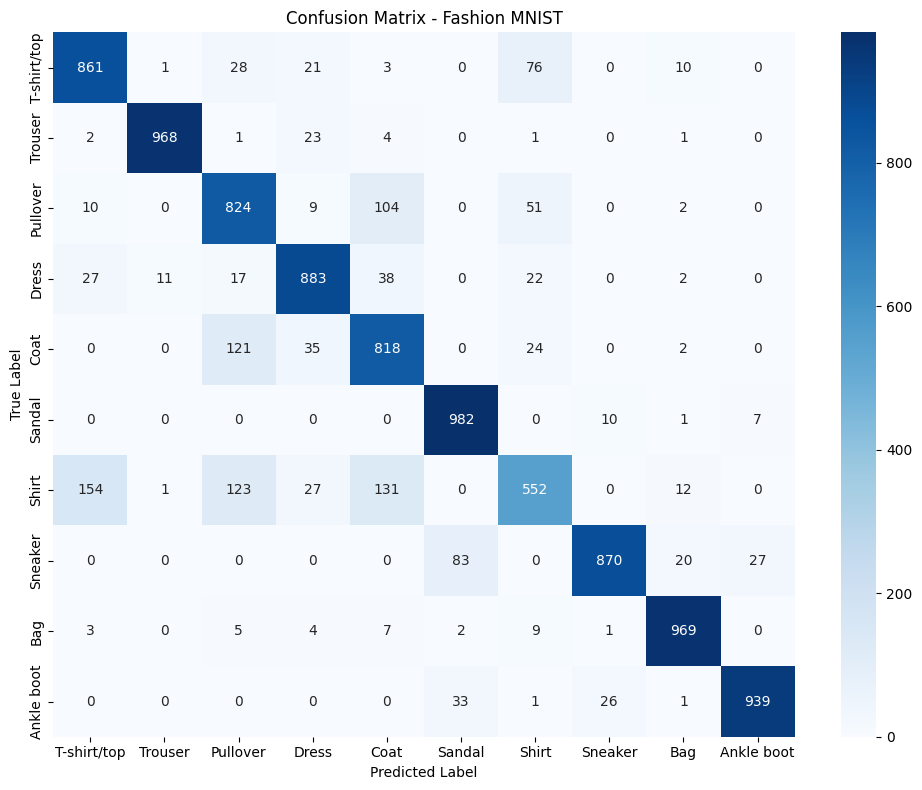

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report

# 1. Load Dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# 2. Normalize the data
x_train, x_test = x_train / 255.0, x_test / 255.0

# 3. One-hot encode labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# 4. Build the model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# 5. Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 6. Train the model
model.fit(x_train, y_train_cat, epochs=5, validation_split=0.1)

# 8. Predict on test data
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
# 7. Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print(f"\nOverall Test Accuracy: {test_acc:.4f}")



# 9. Classification report
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

report = classification_report(y_test, y_pred_classes, target_names=class_names, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# 10. Print per-class accuracy (recall)
print("\nPer-Class Accuracy (Recall):")
print(report_df.loc[class_names, ["recall"]])

# 11. Plot per-class accuracy
plt.figure(figsize=(12, 6))
sns.barplot(x=report_df.loc[class_names].index,
            y=report_df.loc[class_names]["recall"],
            palette="Blues_d")
plt.ylim(0, 1.05)
plt.xticks(rotation=45)
plt.ylabel("Recall (Per-Class Accuracy)")
plt.title("Per-Class Accuracy for Fashion MNIST")
plt.tight_layout()
plt.show()

# 12. Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Fashion MNIST")
plt.tight_layout()
plt.show()